In [96]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv('loan_approval_dataset.csv')#loading the dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [98]:
df.shape

(4269, 13)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [101]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

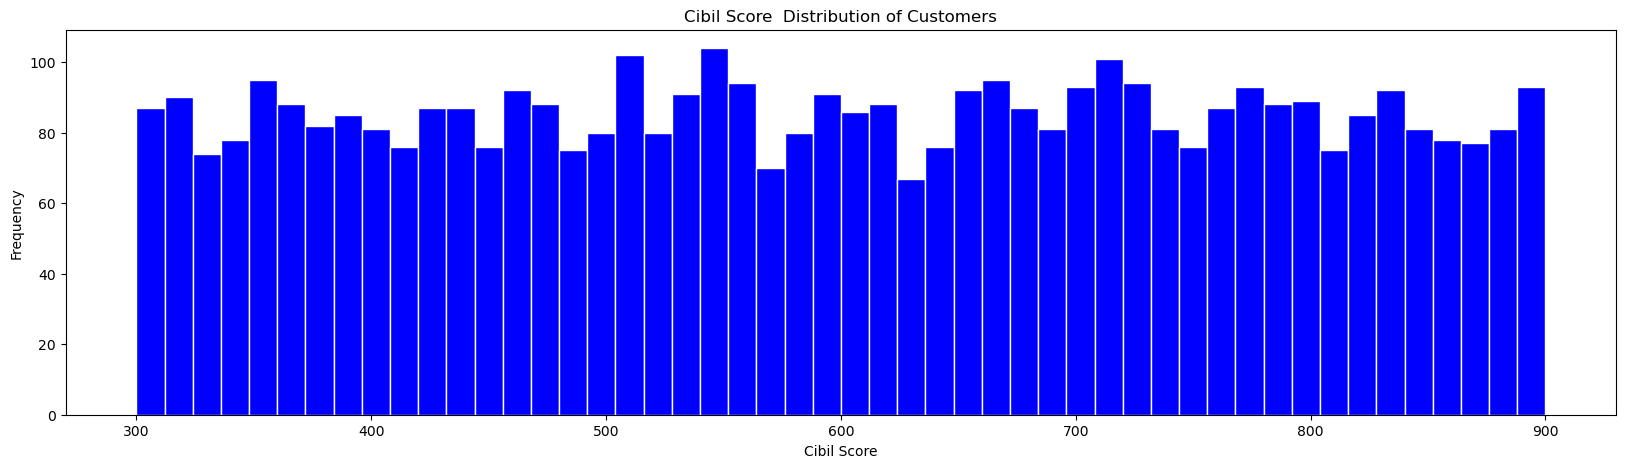

In [102]:
plt.figure(figsize=(20,5))
plt.hist(df[' cibil_score'], bins=50,color="blue",edgecolor='white')
plt.title("Cibil Score  Distribution of Customers")
plt.xlabel('Cibil Score')
plt.ylabel('Frequency')
plt.show

The data points are spread quite evenly, with most bins containing between 70 and 105 observations.

This pattern suggests that any value within the 300-900 range has a roughly equal probability of occurring.

In [103]:
#what is highest cibil score
high=df[' cibil_score'].max()
print(high)

900


In [104]:
#count of customers with maximum cibil score 
print(df[df[' cibil_score']==high].shape[0])

6


In [105]:
#print the details of highest cibil score
print(df[df[' cibil_score']==high].value_counts())

loan_id   no_of_dependents   education     self_employed   income_annum   loan_amount   loan_term   cibil_score   residential_assets_value   commercial_assets_value   luxury_assets_value   bank_asset_value   loan_status
374      4                  Not Graduate  Yes             9200000        25500000      10          900           9400000                    10500000                  27400000              12800000           Approved        1
482      0                  Graduate      Yes             5300000        15000000      2           900           1700000                    2100000                   21000000              5800000            Approved        1
822      0                  Not Graduate  Yes             2000000        5900000       12          900           3800000                    2400000                   7100000               3000000            Approved        1
1868     4                  Not Graduate  Yes             6200000        18300000      4           900   

In [106]:
#what is lowest cibil score
print(df[' cibil_score'].min())

300


In [107]:
#count of customers with minimum cibil score
print(df[df[" cibil_score"]==300].shape[0])

11


In [108]:
#print the details of lowest cibil score
print(df[df[' cibil_score']==300].value_counts())

loan_id   no_of_dependents   education     self_employed   income_annum   loan_amount   loan_term   cibil_score   residential_assets_value   commercial_assets_value   luxury_assets_value   bank_asset_value   loan_status
96       5                  Graduate      No              300000         1100000       2           300           100000                     500000                    700000                400000             Approved        1
1405     5                  Graduate      No              6100000        23500000      16          300           300000                     700000                    22800000              4800000            Rejected        1
1718     0                  Graduate      No              9700000        30400000      4           300           17100000                   16600000                  38100000              9200000            Approved        1
1777     5                  Not Graduate  Yes             7500000        17000000      8           300   

In [109]:
#print the details  of  customers having cibil score between 650-700
print(df[df[' cibil_score'].between(650,700)].value_counts())
#count of customers having cibil score between 650-700  
print(df[df[' cibil_score'].between(650,700)].shape[0])     

loan_id   no_of_dependents   education     self_employed   income_annum   loan_amount   loan_term   cibil_score   residential_assets_value   commercial_assets_value   luxury_assets_value   bank_asset_value   loan_status
7        5                  Graduate      No              8700000        33000000      4           678           22500000                   14800000                  29200000              4300000            Approved        1
2836     3                  Graduate      Yes             1400000        2700000       14          694           3800000                    200000                    3600000               1700000            Approved        1
2957     3                  Not Graduate  No              3600000        9800000       12          654           600000                     1300000                   7500000               2200000            Approved        1
2937     2                  Not Graduate  No              6800000        21300000      20          658   

In [110]:
#maxium frequency of cibil score
print(df[' cibil_score'].mode())

0    348
Name:  cibil_score, dtype: int64


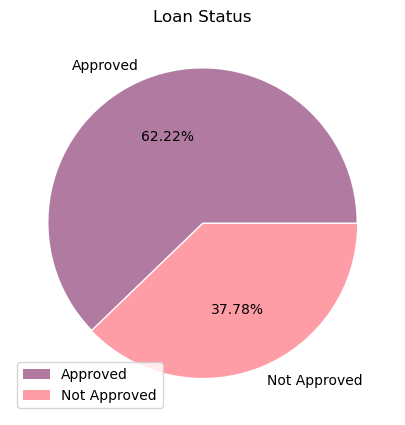

In [111]:
plt.figure(figsize=(20,5))
plt.pie(df[" loan_status"].value_counts().values,
        labels=['Approved','Not Approved'],
        colors=['#B07AA1', '#FF9DA7'],
        explode = (0,0.01),# to separate the slices
        autopct='%1.2f%%',
        )
plt.title("Loan Status")
plt.legend()
plt.show()


In [112]:
#count the no of loan status approved and not approved
print(df[' loan_status'].value_counts())

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


The "Approved" class is the clear majority, accounting for 62.22% of the instances.

Conversely, the "Rejected" class represents the minority, making up the remaining 37.78%.

This class imbalance is a crucial consideration for predictive modeling, as it could lead to a model that is biased towards the majority "Approved" outcome

In [113]:
 #the max and min cibil score for approved loans
df.columns=df.columns.str.strip() #removing leading and trailing spaces from column names
df['loan_status']=df['loan_status'].astype(str).str.strip().str.title() #standardizing the loan status values
df['cibil_score'] = pd.to_numeric(df['cibil_score'], errors='coerce')#converting cibil score to numeric
approved=df[df['loan_status']=='Approved']
print("Maximun Cibil Score for Approved Loans:",approved['cibil_score'].max())
print("Minimum Cibil Score for Approved Loans:",approved['cibil_score'].min())

Maximun Cibil Score for Approved Loans: 900
Minimum Cibil Score for Approved Loans: 300


In [114]:
rejected = df[df['loan_status'] == 'Rejected']
print("Maximum CIBIL Score for Rejected Loans:",rejected['cibil_score'].max())
print("Minimum CIBIL Score for Rejected Loans:", rejected['cibil_score'].min())

Maximum CIBIL Score for Rejected Loans: 885
Minimum CIBIL Score for Rejected Loans: 300


In [115]:
#What is the total loan amount by loan status?
avg=df.groupby('loan_status')['loan_amount'].sum()
print(avg)

loan_status
Approved    40496700000
Rejected    24108000000
Name: loan_amount, dtype: int64


In [116]:
#What is the median income for self-employed vs non-self-employed people?
median=df.groupby('self_employed')['income_annum'].median()
print(median)

self_employed
No     5100000.0
Yes    5100000.0
Name: income_annum, dtype: float64


In [117]:
#Which education group has the highest average CIBIL score?
high=df.groupby('education')['cibil_score'].max()
print(high)

education
Graduate        900
Not Graduate    900
Name: cibil_score, dtype: int64


In [118]:
#How many loans were approved (loan_status = Approved)
app_loan=df['loan_status'].value_counts()
print(app_loan)

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [119]:
#List all applicants with loan term < 12 months.
loan= df[df['loan_term']<12].value_counts() 
print(loan)

loan_id  no_of_dependents  education     self_employed  income_annum  loan_amount  loan_term  cibil_score  residential_assets_value  commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status
2        0                 Not Graduate  Yes            4100000       12200000     8          417          2700000                   2200000                  8800000              3300000           Rejected       1
2824     4                 Not Graduate  Yes            2700000       6800000      10         455          4700000                   2600000                  7400000              2700000           Rejected       1
2845     3                 Graduate      No             8900000       19100000     6          807          2300000                   16500000                 29900000             10400000          Approved       1
2844     1                 Not Graduate  No             500000        1400000      6          464          1100000                   0               

In [120]:
#What’s the average residential asset value for approved loans?
avg=df[df['loan_status']=='Approved']['residential_assets_value'].mean()
print(avg)

7399811.746987952


In [121]:
#What’s the total asset value (sum of all asset columns) per person?
df['total']=df[["residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"]].sum(axis=1)
print(df['total'])

0       50700000
1       17000000
2       57700000
3       52700000
4       55000000
          ...   
4264     7400000
4265    20000000
4266    39000000
4267    28800000
4268    77300000
Name: total, Length: 4269, dtype: int64


In [122]:
#Who has the highest total assets?
high=df['total'].idxmax()
print(high)

3119


In [123]:
#What’s the average loan-to-income ratio?
df['ratio']=df['loan_amount']/df['income_annum']
a=df['ratio'].mean()
print(a)

2.9848066070972563


In [124]:
#Which applicants have a loan-to-income ratio > 0.5?
df['high']=df['ratio'][df['ratio']>0.5]
print(df['high'])

0       3.114583
1       2.975610
2       3.263736
3       3.743902
4       2.469388
          ...   
4264    2.300000
4265    3.424242
4266    3.676923
4267    3.121951
4268    3.228261
Name: high, Length: 4269, dtype: float64


In [147]:
#Which numeric features are correlated with loan_amount?
df.corr()['loan_amount'].sort_values(ascending=False)


loan_amount                 1.000000
income_annum                0.927470
total                       0.867067
luxury_assets_value         0.860914
bank_asset_value            0.788207
commercial_assets_value     0.603251
residential_assets_value    0.595807
ratio                       0.340791
high                        0.340791
loan_term                   0.008437
self_employed               0.001450
no_of_dependents           -0.003366
education                  -0.010631
loan_status                -0.016150
cibil_score                -0.017035
Name: loan_amount, dtype: float64

In [150]:
#Top 5 applicants with highest income
top=df['income_annum'].nlargest(5)
print(top)

82     9900000
157    9900000
300    9900000
360    9900000
509    9900000
Name: income_annum, dtype: int64


In [152]:
#Top 5 applicants with lowest CIBIL score.
low=df['cibil_score'].nsmallest(5)
print(low)

95      300
1404    300
1717    300
1776    300
2596    300
Name: cibil_score, dtype: int64


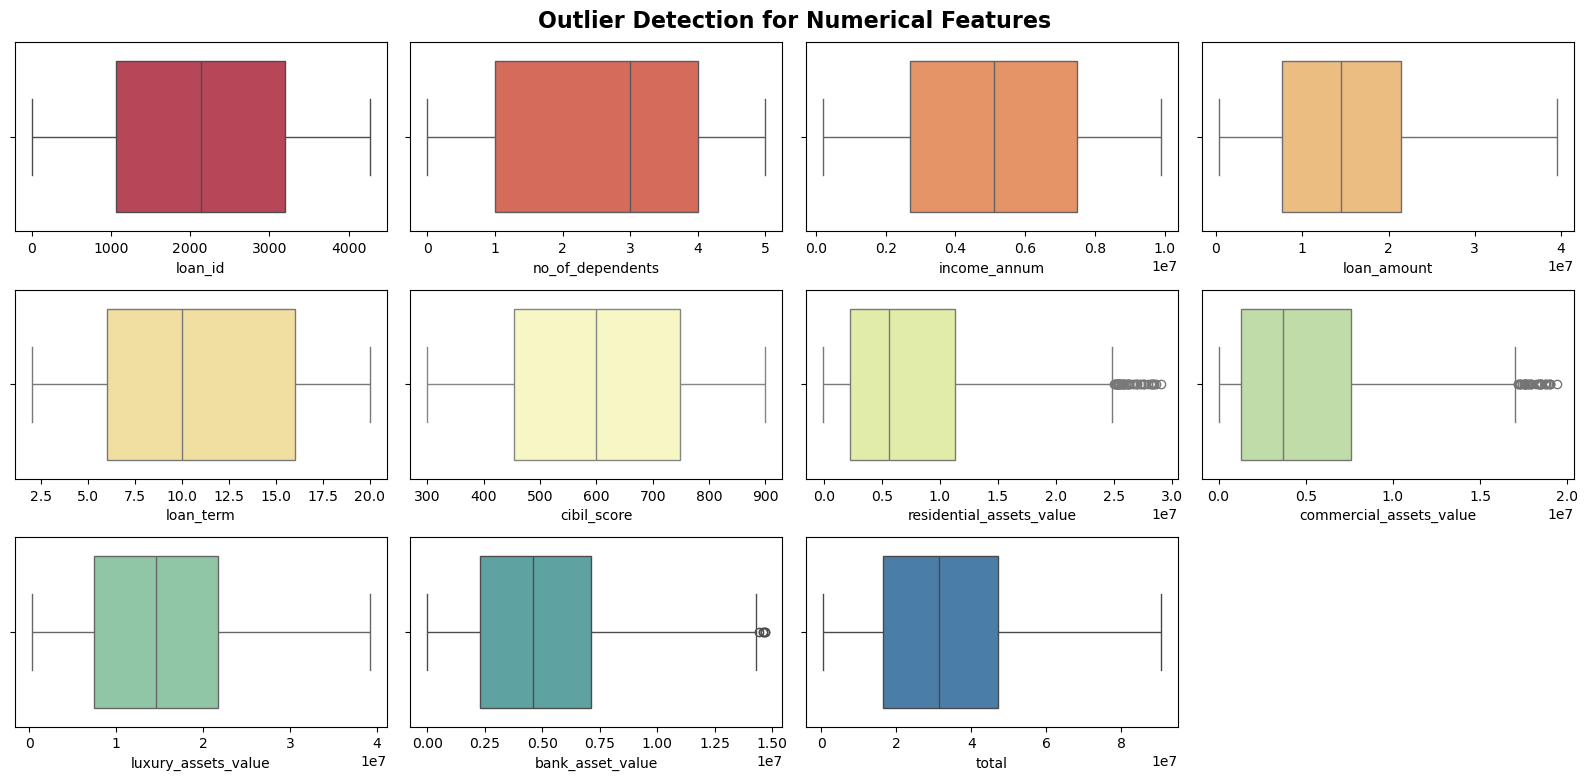

In [127]:
#outliers detection 
numerical_cols=df.select_dtypes(include=['Int64']).columns
colors = sns.color_palette("Spectral", len(numerical_cols))
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col],color=colors[i-1])
    plt.suptitle("Outlier Detection for Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout()

Observations and Insights from Outlier Detection Plots

Significant Right-Skewness in Asset Features: The boxplots for residential_assets_value, commercial_assets_value, luxury_assets_value, and bank_asset_value all reveal highly right-skewed distributions. This is indicated by the medians being close to the bottom of the boxes and numerous data points lying far beyond the upper whisker, highlighting a significant presence of high-value outliers. This suggests that while most applicants have modest asset values, a small subset possesses exceptionally high-value assets.

Varied Distributions for Other Features: The cibil_score distribution is left-skewed, implying that the dataset contains a higher concentration of individuals with good credit scores. In contrast, features like income_annum and loan_term appear relatively symmetrical with no obvious outliers. The loan_amount shows a slight right skew.

Implications for Data Preprocessing: The numerous outliers in the asset-related features can disproportionately influence the performance of many machine learning models. Therefore, it's crucial to apply appropriate data transformation techniques—such as log transformation to reduce the skewness or capping/winsorization to handle the extreme values—before proceeding with model building.

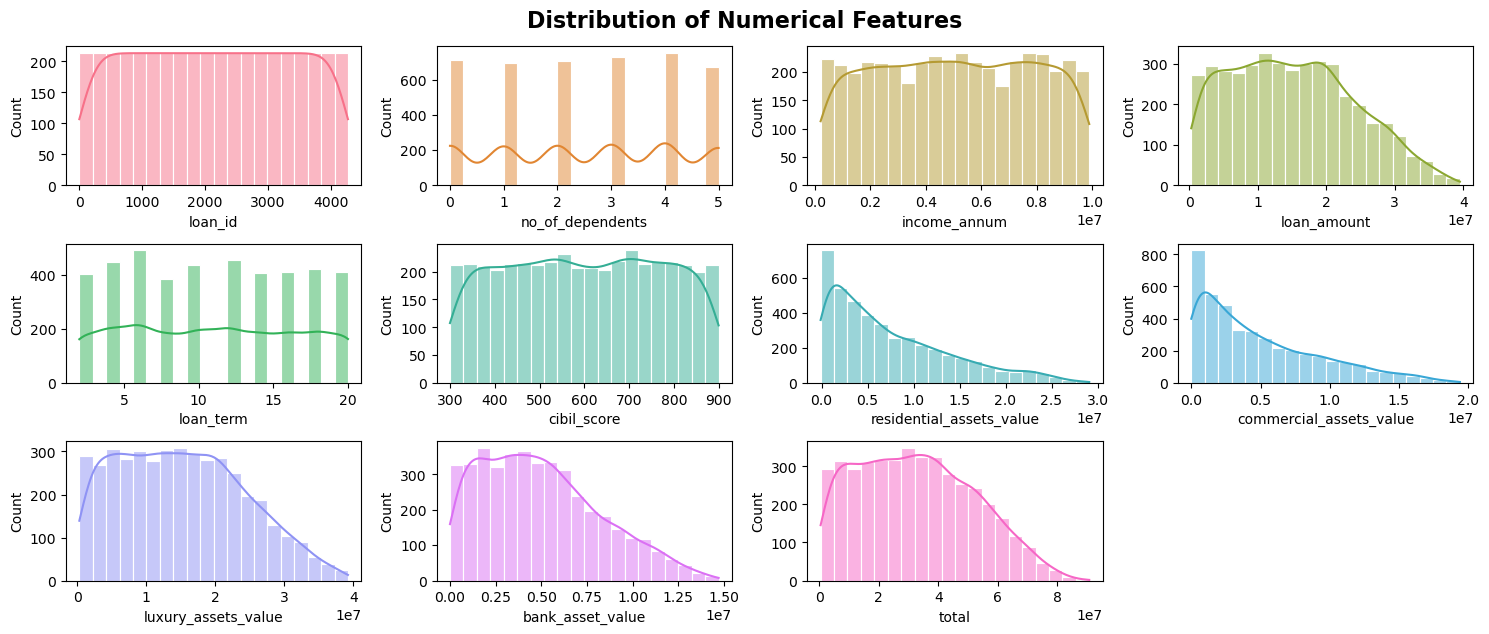

In [128]:
#distribution of all numerical features
numerical_cols=df.select_dtypes(include='int64').columns
colors=sns.color_palette("husl",len(numerical_cols))
plt.figure(figsize=(15,8))
for i,col in enumerate(numerical_cols,1):
    plt.subplot(4,4,i)
    sns.histplot(x=df[col],kde=True,color=colors[i-1],bins=20,edgecolor='white')
    plt.suptitle("Distribution of Numerical Features",fontsize=16,fontweight="bold")
plt.tight_layout()

Observations and Insights from Distribution Plots

Zero Skewness:Columns such as loan_id and loan_term are nearly symmetrical, showing uniform or evenly distributed data without significant tails.

Positive Skewness:Features including income_annum, loan_amount, residential_assets_value, commercial_assets_value, luxury_assets_value, and bank_asset_value are right-skewed — most values lie on the lower side with a few large outliers.

 Negative Skewness:The cibil_score distribution is slightly left-skewed, where most applicants have higher credit scores and fewer have lower ones.



**Relation between Target column with Categorical columns**

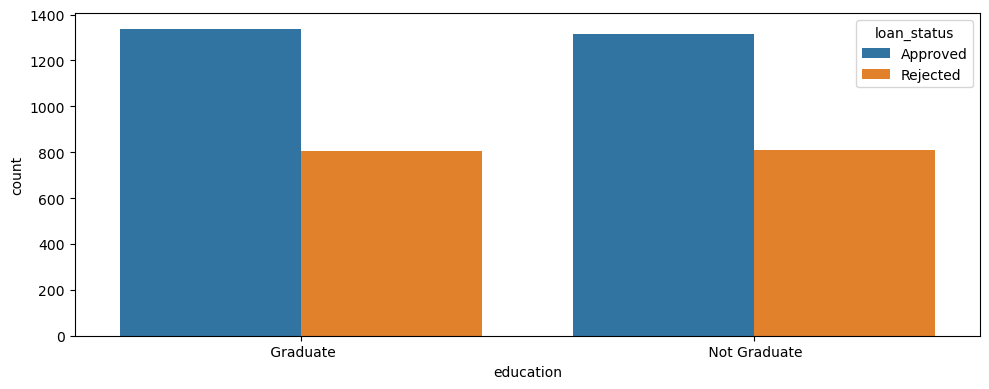

In [129]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df['education'],hue=df['loan_status'])
plt.tight_layout()

Education vs Loan Status

Loan approval rates are almost identical for Graduates and Non-Graduates.
Education level does not appear to be a strong differentiator in loan approval decisions.

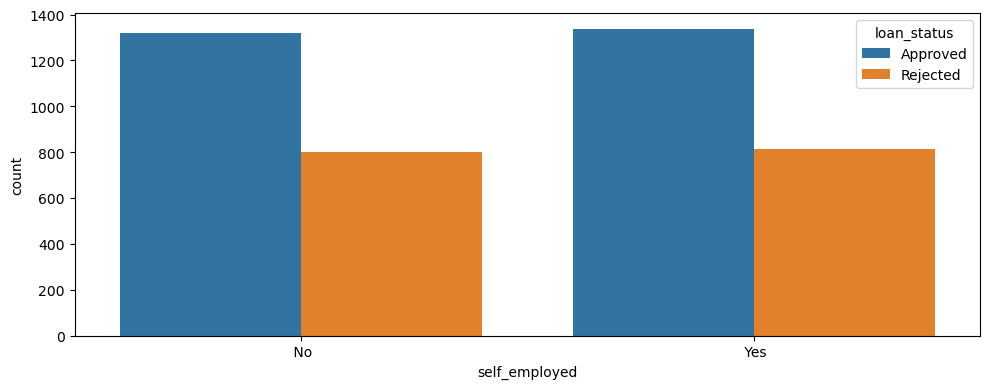

In [130]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df['self_employed'],hue=df['loan_status'])
plt.tight_layout()

Self Employed vs Loan Status

Approval rate is virtually the same for self-employed and non–self-employed  applicants.

Employment type does not significantly influence loan approval.


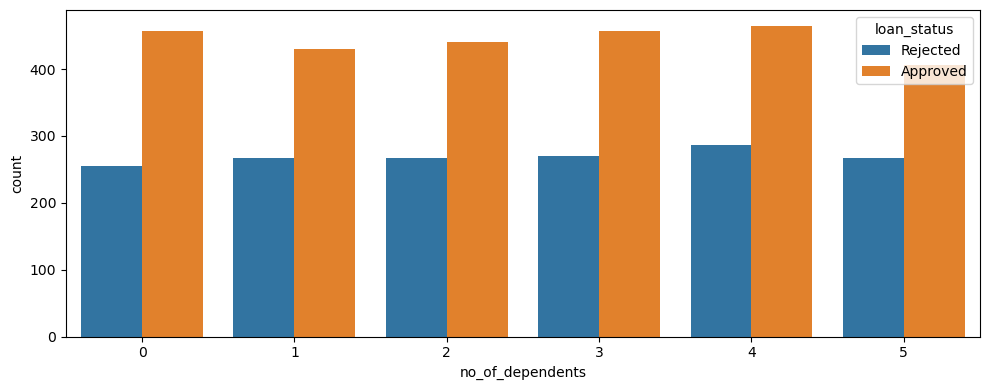

In [131]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['no_of_dependents'],hue=df['loan_status'])
plt.tight_layout()

Number of Dependents vs Loan Status

Applicants with no dependents have the highest approval, suggesting lower financial burden helps approval chances.

As dependents increase, approval rate slightly decreases — from 0 dependents to 5 dependents.

 **Overall Insight:**
Loan approval seems largely unaffected by education or employment type, but a slight decline with more dependents indicates lenders may prefer applicants with fewer financial responsibilities.

**Relation between Target column with Numerical columns**

C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_9688\403070526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'],y=df[col],palette="coolwarm")
C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_9688\403070526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'],y=df[col],palette="coolwarm")
C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_9688\403070526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'],y=df[col],palette="coolwarm")
C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_9688\403070526.p

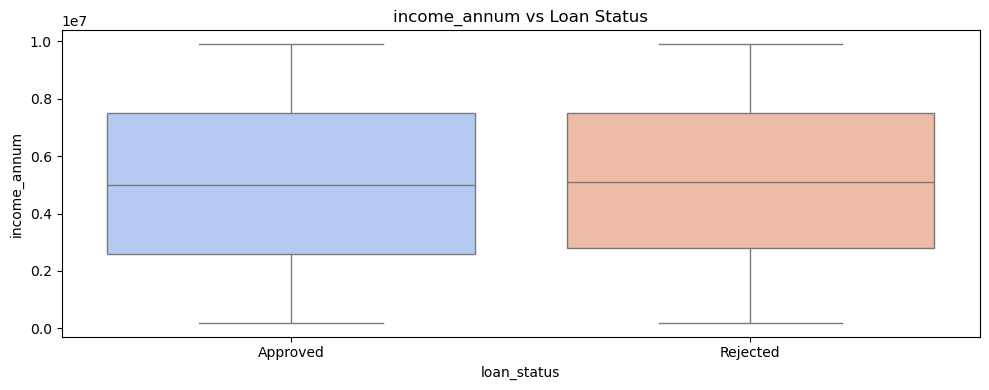

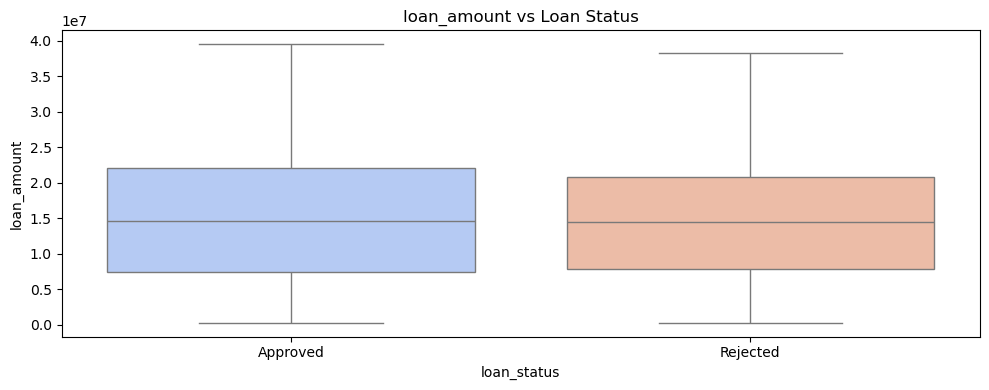

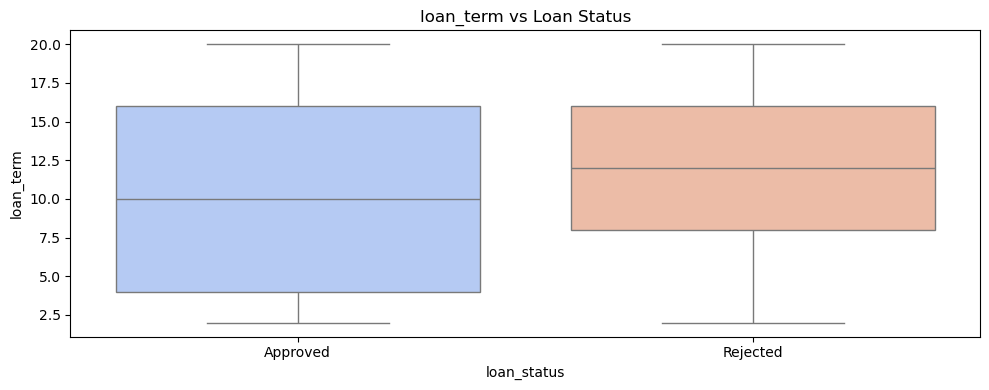

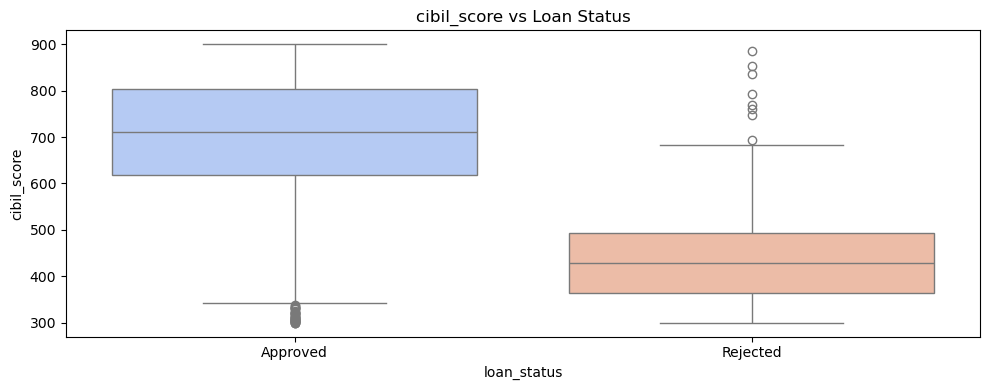

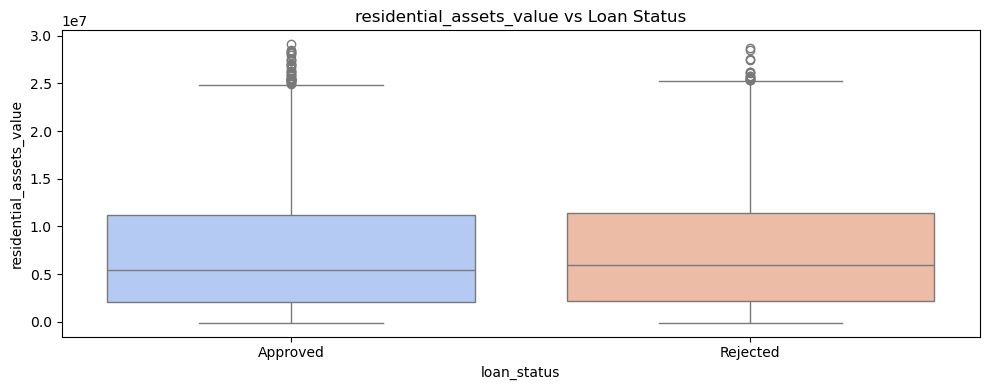

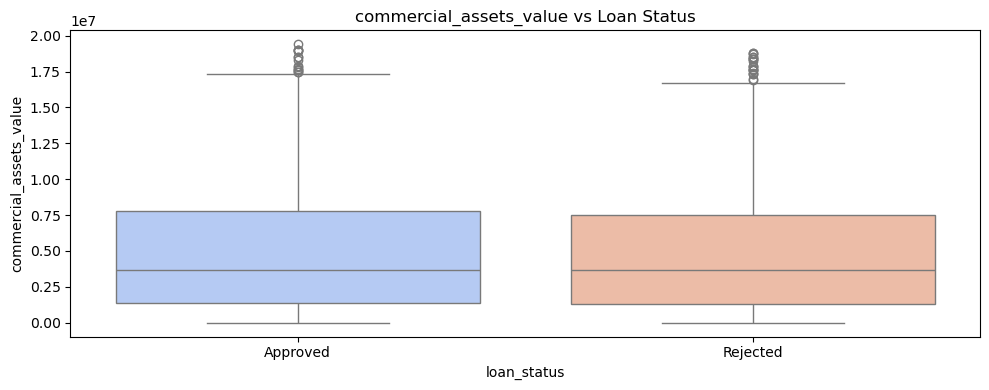

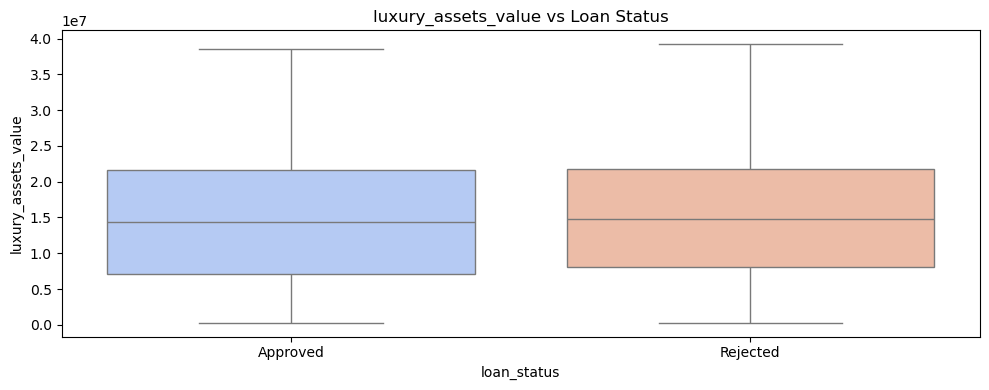

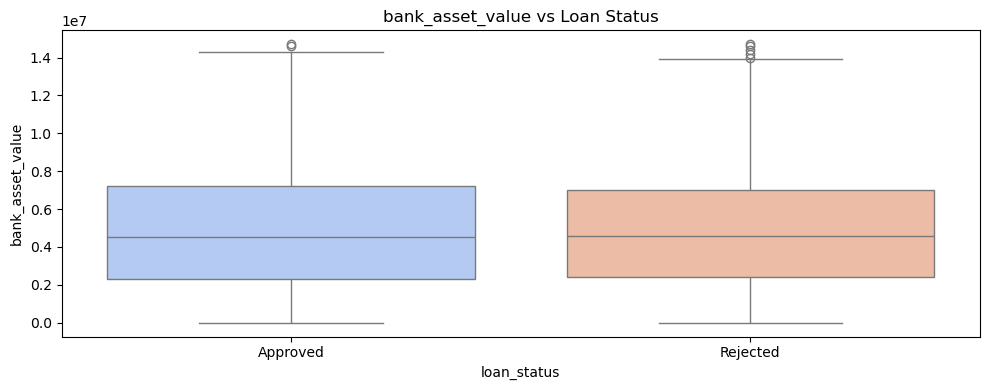

In [132]:
numerical_cols=["income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"]
for col in numerical_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df['loan_status'],y=df[col],palette="coolwarm")
    plt.title(f"{col} vs Loan Status")
    plt.tight_layout()

 **Insight**: 
 CIBIL Score is the strongest predictor of loan status, with approved applicants having a significantly better score. While approved loans tend to be smaller in amount and shorter in term, high asset values surprisingly show a mild negative correlation with approval, possibly indicating rejection for complex or overly large loan applications from high-net-worth individuals.

**Outlier**
We removed outliers to ensure the model learns from realistic applicant patterns instead of being influenced by extreme values.

Outliers can distort feature scales, reduce model accuracy, and cause biased predictions.

We chose the IQR (Interquartile Range) method because it’s simple, robust, and non-parametric—it doesn’t assume any specific data distribution.

This makes it ideal for financial data, where income or asset values often vary widely but shouldn’t dominate the model.


In [133]:
#removing outliers & Outliers processor before split data
def remove_outliers(df, column):
    Q1=df[column].quantile(0.25)#first quartile(median of lower half)
    Q3=df[column].quantile(0.75)#third quartile(median of upper half)
    IQR=Q3 - Q1#interquartile range
    lower_bound=Q1 - 1.5 * IQR#Minimum normal value
    upper_bound=Q3 + 1.5 * IQR#Maximum normal value
    
    df[column]=df[column].clip(lower_bound,upper_bound)
    return df

num_cols = ['no_of_dependents','income_annum','loan_amount','loan_term',
            'cibil_score','residential_assets_value',
            'commercial_assets_value','luxury_assets_value','bank_asset_value']

for col in num_cols:
    df = remove_outliers(df, col)

In [134]:
#delete unneeded column
df = df.drop(columns=['loan_id'])

**Encoding Categorical columns**

We used Label Encoding to convert categorical variables like education, self_employed, and loan_status into numerical form for model training.

Machine learning algorithms cannot process text labels directly, so encoding ensures they can interpret categories as numeric values.

We chose Label Encoding because these features have only two categories (binary) — making it a simple, efficient, and memory-friendly method compared to One-Hot Encoding.

It helps keep the dataset compact and ready for ML models that expect numerical input

In [135]:
# Encode to categorical
import sklearn.preprocessing as preprocessing
label_encoder = preprocessing.LabelEncoder()
categorical_cols = ['education', 'self_employed', 'loan_status']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

**Split data to Train & Test**

| Dataset Part     | Purpose                                                                              | Example              |
| ---------------- | ------------------------------------------------------------------------------------ | -------------------- |
| **Training set** | The model “learns” patterns, relationships, and parameters from this data.           | Used in `.fit()`     |
| **Test set**     | The model is evaluated here to see if it can make correct predictions on *new* data. | Used in `.predict()` |


In [136]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['loan_status'])#features
y = df['loan_status']#target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,#20% of the data goes to the test set, and 80% to training
                                                     random_state=0,#setting a seed value for the random number generator.
                                                     stratify=y)#Keeps the same class proportions in train & test sets

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3415, 14)
Test shape: (854, 14)


**Normalize the Dataset**

Normalize after splitting the data. It's good practice to apply any data transformations to training and testing data separately to prevent data leakage.

In [137]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

**Fitting a logistic regression model to the training data**

This step effectively trains the model to predict the targets from the data.

In [138]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression(max_iter=1000, random_state=42)
model .fit(X_train, y_train)
predictions= model .predict(X_test)#Make predictions on the testing data

In [139]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  284
False Positive(FP) =  32
True Negative(TN)  =  499
False Negative(FN) =  39


In [140]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier using Logistic Regression  = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier using Logistic Regression  = 0.917


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_9688\2254723894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


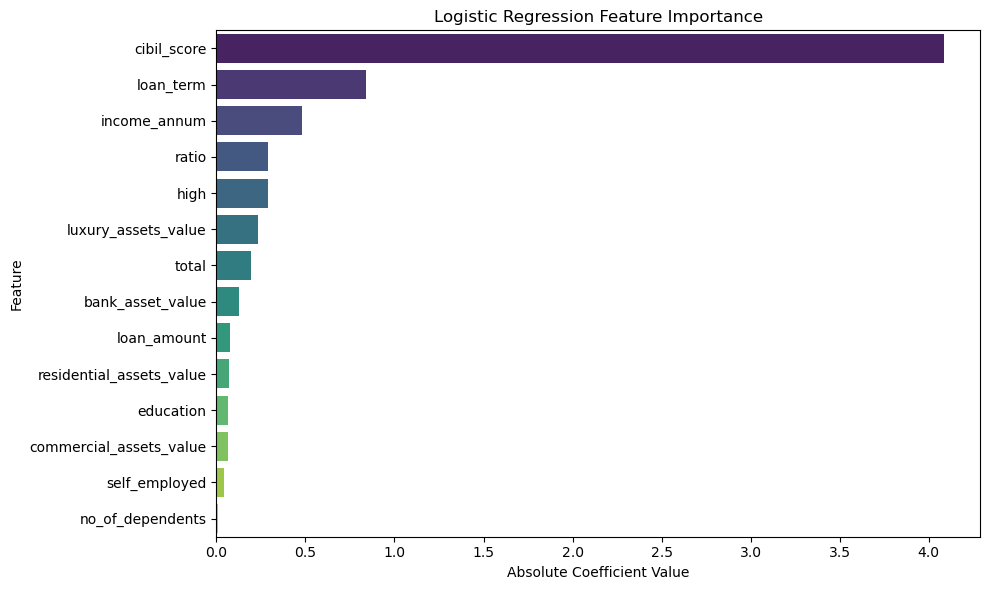

In [141]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,              #Original DataFrame’s column names
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

cibil_score dominates the model having highest importance.


**Initializing each binary classifier**

In [142]:
models={}# model and store it by name in a dictionary:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [144]:
df_models = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()

df_models

,Accuracy,Precision,Recall
Logistic Regression,0.916862,0.879257,0.898734
Support Vector Machines,0.919204,0.888545,0.896875
Decision Trees,0.991803,0.996904,0.981707
Random Forest,0.995316,0.996904,0.990769
Naive Bayes,0.944965,0.947368,0.910714
K-Nearest Neighbor,0.887588,0.851393,0.851393


 **Insights**

Decision Trees(	0.981) clearly outperforms across all metrics, especially for predicting approved loans.

K-Nearest Neighbor struggles with recall for approved loans (0.88).

Business Impact: Decision Trees is safer for loan decisions, minimizing risky false approvals while accurately identifying approvals.

Next Steps: Random Forest may still be useful for interpretability, but for best predictive performance,Decision Trees is preferred.